In [1]:
import pandas as pd
import hashlib as hl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

df = pd.read_csv("../athlete_events.csv")

hashes = df["Name"].apply(lambda client_num: hl.sha256(client_num.encode()).hexdigest())
df.insert(1, "SHA Hash Values", hashes)
drop = df.drop(columns= ["Name"])
df = drop

# Tyskland


In [2]:
""" Försöker hitta en kod som sållar bort alla medaljer för teamsporter """

ger_df = df[df["NOC"] == "GER"]

medal = ger_df["Medal"].isin(["Gold", "Silver", "Bronze"])
medals = ger_df[medal]

# fotball = medals["Sport"].isin(["Football"])
# only_fotball = medals[fotball]
# only_fotball.sort_values(by="Year", ascending=False).head(3)

In [3]:
medals

ID                                    SHA Hash Values Sex   Age  \
1244       702  fbf3c79d0b7326e440e9c4466354a000cf1de31f9ad91f...   M  24.0   
1246       702  fbf3c79d0b7326e440e9c4466354a000cf1de31f9ad91f...   M  24.0   
1247       702  fbf3c79d0b7326e440e9c4466354a000cf1de31f9ad91f...   M  28.0   
1373       775  5ceb19a2c77a5489c608772f192a88a586cabc7ed052bb...   M  26.0   
1533       849  839e19c8d4e4fa7d9c0171b35fa1f90b522fb7284f5d49...   M  29.0   
...        ...                                                ...  ..   ...   
269989  135071  f736677eb54f748665c4487eb7cfa4cba10e8ef24ce4fa...   M  25.0   
270896  135474  0b34faecf5c6ebd7121517cdb9c5a6895b1dfe768692a3...   M  18.0   
270898  135474  0b34faecf5c6ebd7121517cdb9c5a6895b1dfe768692a3...   M  22.0   
271009  135520  a78fdcfa1f1c69ecbd9abf7b151d3a25acc5178de12df9...   F  28.0   
271019  135525  5a1ea9b60162fe8524cedfdef475cd5296fb3cf531c0d5...   M  29.0   

        Height  Weight     Team  NOC        Games  Year  Season  \
1244     184.0    69.0  Germany  GER  2002 Winter  2002  Winter   
1246     184.0    69.0  Germany  GER  2002 Winter  2002  Winter   
1247     184.0    69.0  Germany  GER  2006 Winter  2006  Winter   
1373       NaN     NaN  Germany  GER  1936 Summer  1936  Summer   
1533     189.0    87.0  Germany  GER  2012 Summer  2012  Summer   
...        ...     ...      ...  ...          ...   ...     ...   
269989   182.0    80.0  Germany  GER  1992 Winter  1992  Winter   
270896     NaN     NaN  Germany  GER  1908 Summer  1908  Summer   
270898     NaN     NaN  Germany  GER  1912 Summer  1912  Summer   
271009   167.0    60.0  Germany  GER  2004 Summer  2004  Summer   
271019   175.0    64.0  Germany  GER  2016 Summer  2016  Summer   

                  City            Sport                             Event  \
1244    Salt Lake City  Nordic Combined        Nordic Combined Men's Team   
1246    Salt Lake City  Nordic Combined      Nordic Combined Men's Sprint   
1247            Torino  Nordic Combined        Nordic Combined Men's Team   
1373            Berlin          Fencing          Fencing Men's Foil, Team   
1533            London           Rowing         Rowing Men's Coxed Eights   
...                ...              ...                               ...   
269989     Albertville    Speed Skating  Speed Skating Men's 1,000 metres   
270896          London           Diving          Diving Men's Springboard   
270898       Stockholm           Diving             Diving Men's Platform   
271009          Athina           Hockey             Hockey Women's Hockey   
271019  Rio de Janeiro           Hockey               Hockey Men's Hockey   

         Medal  
1244    Silver  
1246    Silver  
1247    Silver  
1373    Bronze  
1533      Gold  
...        ...  
269989    Gold  
270896    Gold  
270898  Silver  
271009    Gold  
271019  Bronze  

[2165 rows x 15 columns]

<BarContainer object of 5 artists>

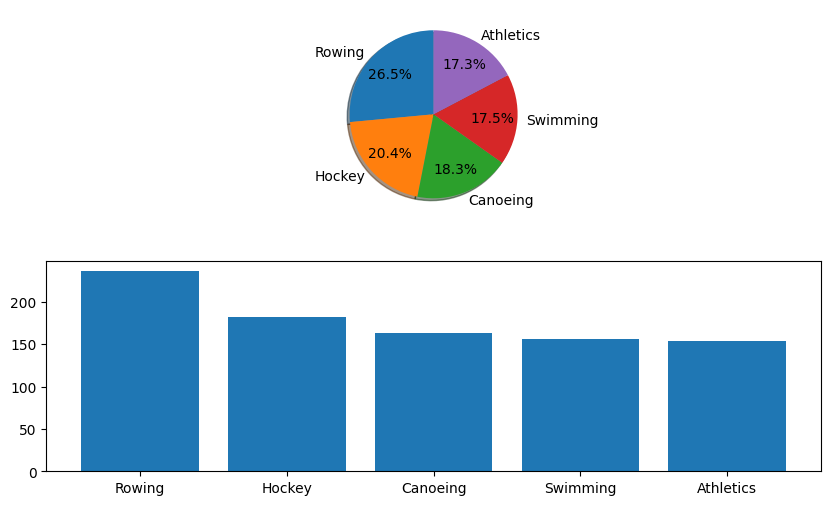

In [4]:
sport_top_5 = medals["Sport"].value_counts().head(5)
sport_top_5


fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].pie(sport_top_5, labels=sport_top_5.index, autopct="%1.1f%%", pctdistance=0.7, startangle=90, shadow=True)

ax[1].bar(sport_top_5.index, sport_top_5.values)

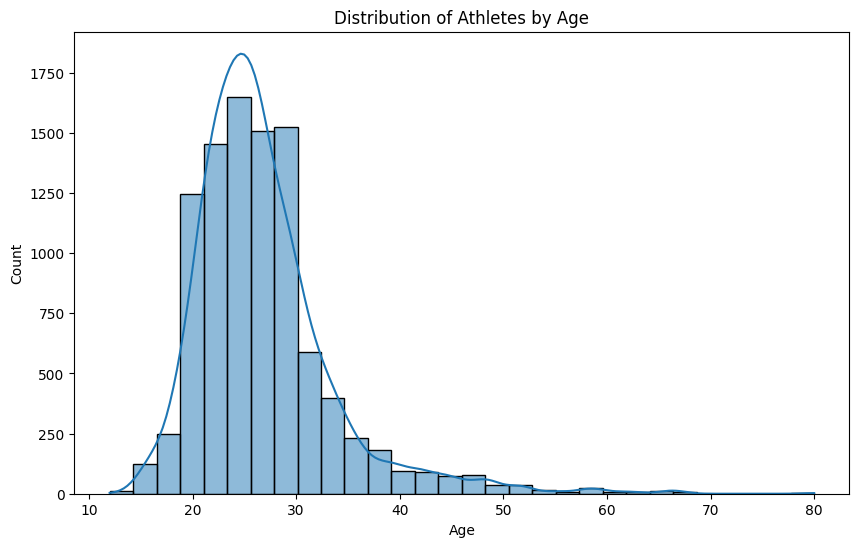

In [5]:
# Distribution of athletes by age
plt.figure(figsize=(10, 6))
sns.histplot(data=ger_df, x="Age", bins=30, kde=True)
plt.title('Distribution of Athletes by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

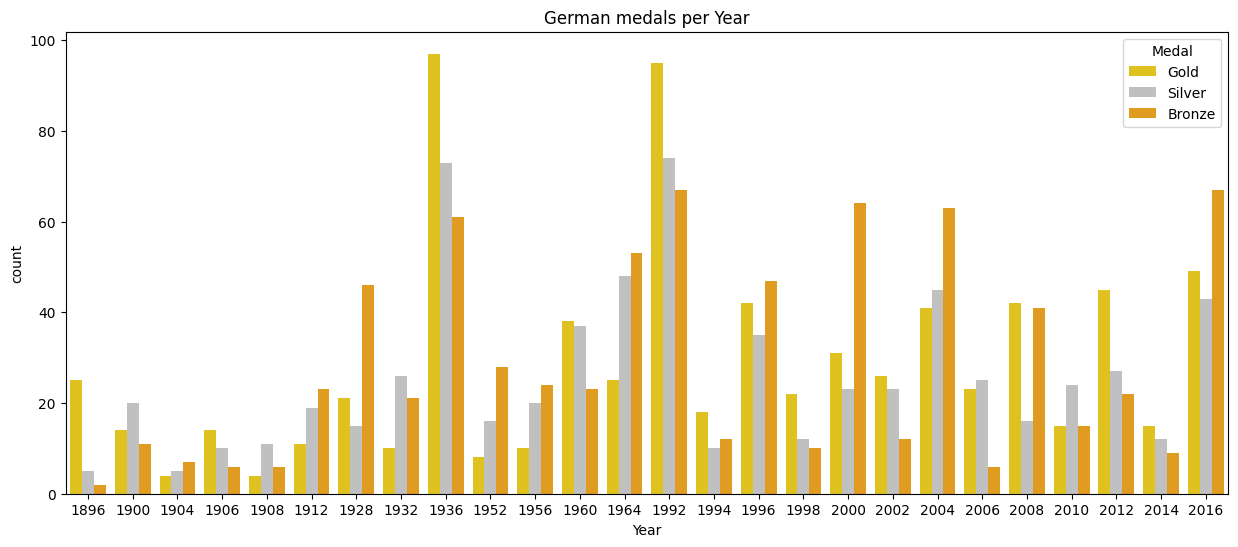

In [6]:
medals
colcor = ["gold", "silver", "orange"]
plt.figure(figsize=(15, 6))
sns.countplot(data=medals, x="Year", hue="Medal", palette=colcor)
plt.title("German medals per Year")
plt.show()

In [7]:
""" Tabell på medaljer per land """


ger_df = pd.concat([ger_df,pd.get_dummies(df["Medal"])],axis = 1)

medals = ger_df.groupby("NOC").sum()[["Gold","Silver","Bronze"]].sort_values("Gold",ascending=False).reset_index()
medals.head()

NOC  Gold  Silver  Bronze
0  GER   745     674     746

# The Whole World

In [8]:
""" Tabell på medaljer per land top 10 """

df_cleaned_nan = df.dropna(subset=["Medal"])

df_cleaned_nan = pd.concat([df_cleaned_nan, pd.get_dummies(df_cleaned_nan["Medal"], prefix='Medal')], axis=1)

medals = df_cleaned_nan.groupby("NOC").sum()[["Medal_Gold", "Medal_Silver", "Medal_Bronze"]].sort_values("Medal_Gold", ascending=False).reset_index()

medals.head(10)


NOC  Medal_Gold  Medal_Silver  Medal_Bronze
0  USA        2638          1641          1358
1  URS        1082           732           689
2  GER         745           674           746
3  GBR         678           739           651
4  ITA         575           531           531
5  FRA         501           610           666
6  SWE         479           522           535
7  CAN         463           438           451
8  HUN         432           332           371
9  GDR         397           327           281

Text(0.5, 1.0, 'Gold medals')

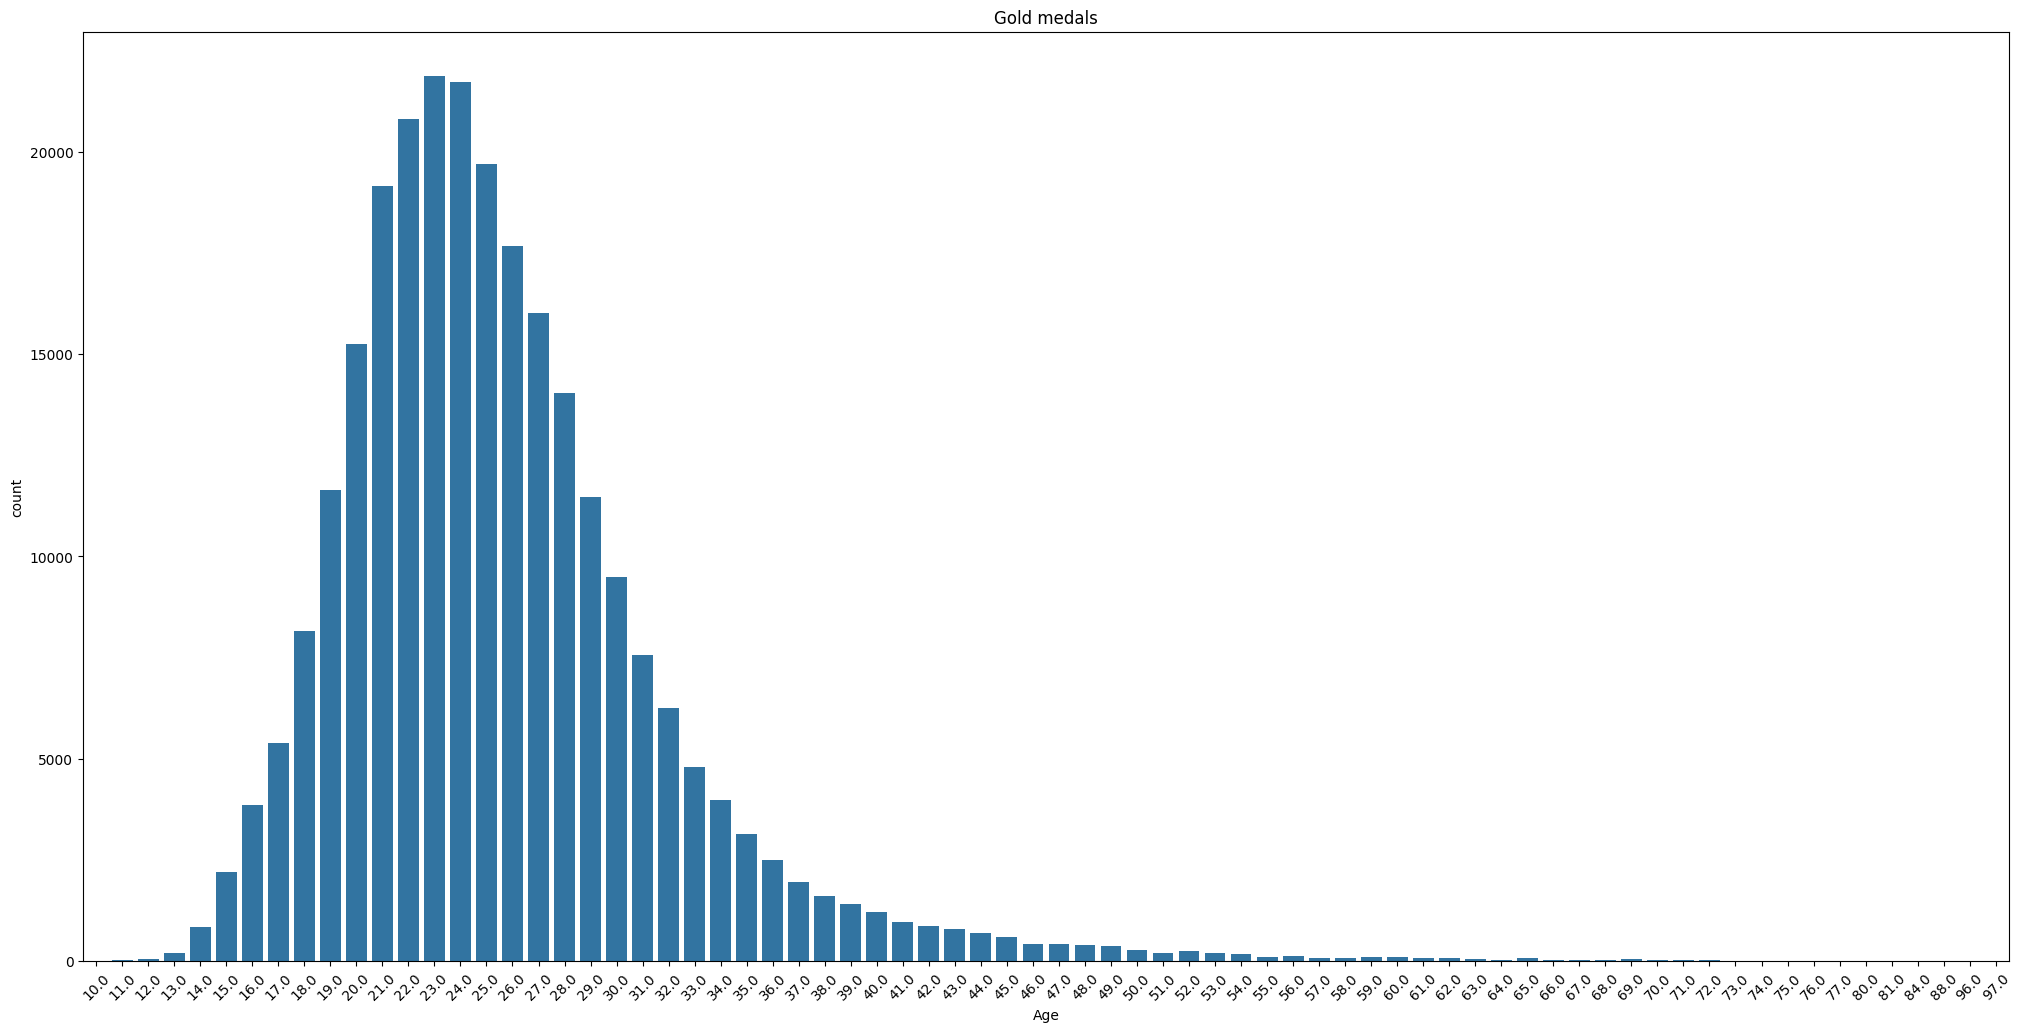

In [9]:
""" Chart på åldern på alla som tagit guld """

""" Röd linje på medelåldern, renskriv koden"""
# age_mean = age1.mean()
# plt.axvline(age_mean, color="r", label="Medel ålder") # Markering på valt värde


gold_medalists = df[df["Medal"] == 'Gold']

plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.tight_layout()
sns.countplot(data=gold_medalists,x=df["Age"])
plt.title("Gold medals")

In [10]:
""" Hur många sporter det är på vintern"""
winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports
""" Hur många sporter det är på sommaren """
summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports
"""" Chart kopplat till det"""
plt.figure(figsize=(12,6))
plt.title('Sex distribution among the athletes')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=150, shadow=True)


# Hur många grena i ett stapeldiagram per år som har spelats, kanske något år som det var väldigt många olika grenar
# Hur många os som har utspelats
# Diiagram på städer som fått ha os


NameError: name 'athletes_df' is not defined

In [12]:
# Filtrering på alla dubletter som förekommer av valda kolumner
temp_df = df.dropna(subset=["Medal"])
temp_df = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])


# Droppar alla nan i medaljkolumnen, listar alla länder
cleaned_df =temp_df.dropna(subset=["Medal"])
cleaned_df

ID                                    SHA Hash Values Sex   Age  \
3            4  0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...   M  34.0   
37          15  3b70d79488d4343b1563bd30087f1bb2b2690d6a32b43c...   M  30.0   
38          15  3b70d79488d4343b1563bd30087f1bb2b2690d6a32b43c...   M  30.0   
40          16  ae93a503a6f4349bbb966008ad5ed852094c75c4ef1d08...   M  28.0   
41          17  b6842ad32bec75ba8629ef084d111514ea97f859a7ebd5...   M  28.0   
...        ...                                                ...  ..   ...   
271010  135521  d5b4cb26e89ac0f3fe6ce9971b8e0dba21ccb2eb89d869...   M  23.0   
271032  135535  d46f594ecfae07fb31c9490c834765fecbc9217d540473...   F  22.0   
271076  135553  57f7def0d4f4cb97348eb47b2c6764eda7a605e01deb83...   F  21.0   
271078  135553  57f7def0d4f4cb97348eb47b2c6764eda7a605e01deb83...   F  25.0   
271080  135553  57f7def0d4f4cb97348eb47b2c6764eda7a605e01deb83...   F  33.0   

        Height  Weight            Team  NOC        Games  Year  Season  \
3          NaN     NaN  Denmark/Sweden  DEN  1900 Summer  1900  Summer   
37         NaN     NaN         Finland  FIN  1920 Summer  1920  Summer   
38         NaN     NaN         Finland  FIN  1920 Summer  1920  Summer   
40       184.0    85.0         Finland  FIN  2014 Winter  2014  Winter   
41       175.0    64.0         Finland  FIN  1948 Summer  1948  Summer   
...        ...     ...             ...  ...          ...   ...     ...   
271010     NaN    66.0         Austria  AUT  1924 Summer  1924  Summer   
271032   181.0    78.0     Netherlands  NED  1996 Summer  1996  Summer   
271076   168.0    80.0    Soviet Union  URS  1952 Summer  1952  Summer   
271078   168.0    80.0    Soviet Union  URS  1956 Summer  1956  Summer   
271080   168.0    80.0    Soviet Union  URS  1964 Summer  1964  Summer   

             City          Sport                                   Event  \
3           Paris     Tug-Of-War             Tug-Of-War Men's Tug-Of-War   
37      Antwerpen       Swimming  Swimming Men's 200 metres Breaststroke   
38      Antwerpen       Swimming  Swimming Men's 400 metres Breaststroke   
40          Sochi     Ice Hockey             Ice Hockey Men's Ice Hockey   
41         London     Gymnastics  Gymnastics Men's Individual All-Around   
...           ...            ...                                     ...   
271010      Paris  Weightlifting         Weightlifting Men's Lightweight   
271032    Atlanta           Judo               Judo Women's Middleweight   
271076   Helsinki      Athletics              Athletics Women's Shot Put   
271078  Melbourne      Athletics              Athletics Women's Shot Put   
271080      Tokyo      Athletics              Athletics Women's Shot Put   

         Medal  
3         Gold  
37      Bronze  
38      Bronze  
40      Bronze  
41      Bronze  
...        ...  
271010  Silver  
271032  Bronze  
271076    Gold  
271078  Silver  
271080  Bronze  

[18927 rows x 15 columns]

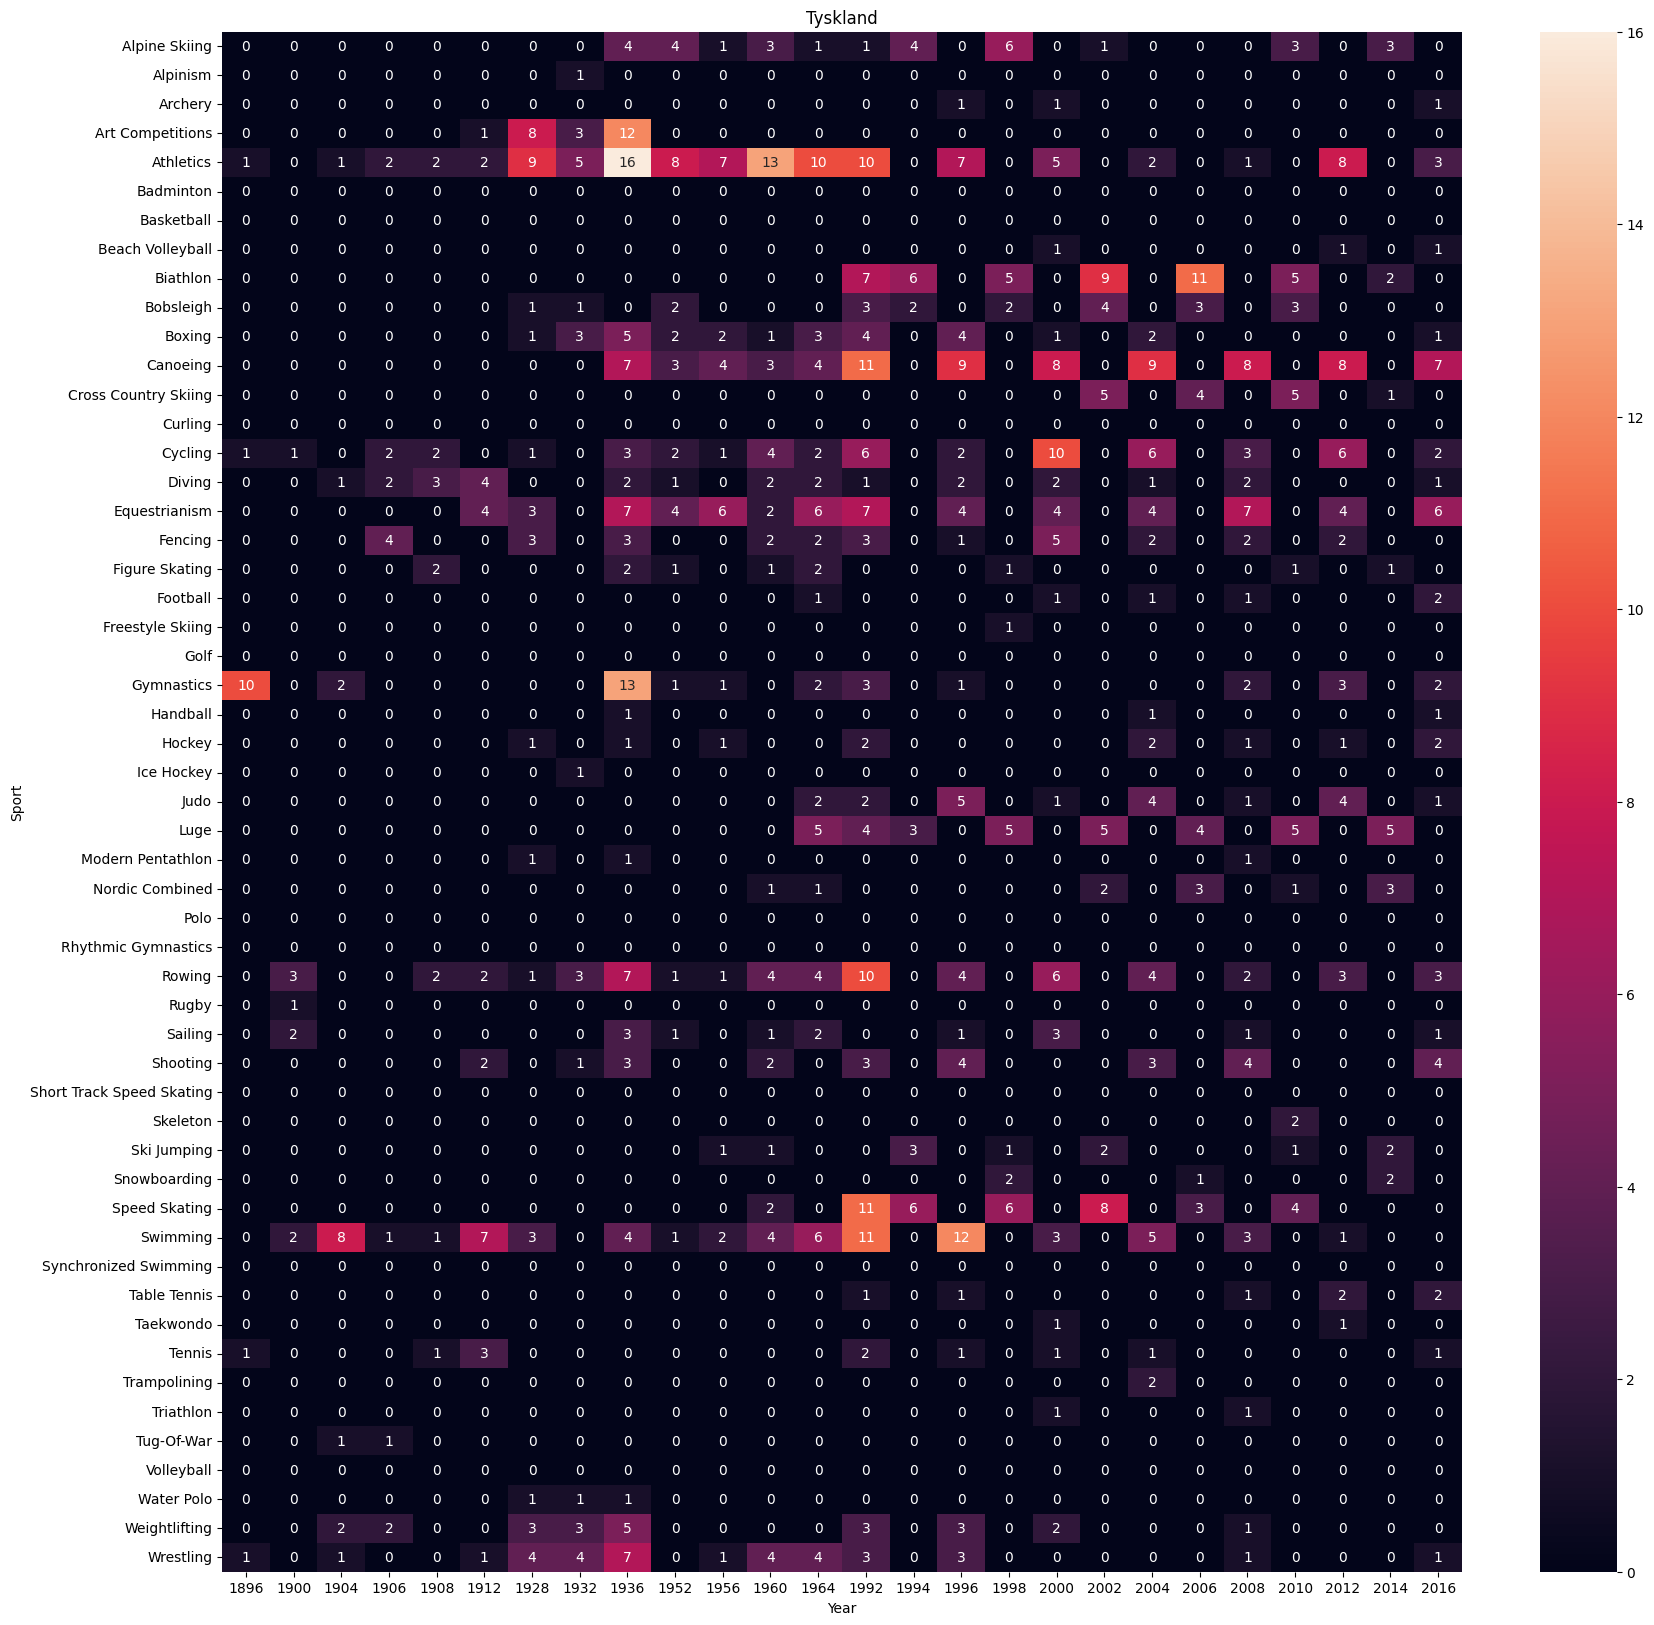

: 

In [ ]:
""" Heatmap på alla medaljer Tyskland har gjort i olika idrotter och år """

plt.figure(figsize=(20,20))
new_df = temp_df[temp_df.NOC=="GER"]
final_df = sns.heatmap(new_df.pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0),annot=True)

plt.title("Tyskland")
# Kan byta land om man vill

plt.show()

In [14]:
""" Top 10 land med flest medaljer, behöver ej läggas upp på dash """
top10 = temp_df.groupby("Team").count().sort_values("Medal", ascending=False)
top10 = top10.head(10)
top10

ID  SHA Hash Values   Sex   Age  Height  Weight   NOC  Games  \
Team                                                                            
United States  6877             6877  6877  6846    5786    5639  6877   6877   
Soviet Union   2398             2398  2398  2355    2128    2102  2398   2398   
Germany        3597             3597  3597  3558    2918    2887  3597   3597   
Great Britain  4443             4443  4443  4287    3343    3308  4443   4443   
France         4444             4444  4444  4217    3352    3262  4444   4444   
Italy          3951             3951  3951  3847    3150    3032  3951   3951   
Sweden         3251             3251  3251  3247    2301    2280  3251   3251   
Russia         2072             2072  2072  2049    1986    1979  2072   2072   
China          2218             2218  2218  2211    2101    2103  2218   2218   
Australia      3338             3338  3338  3292    2930    2871  3338   3338   

               Year  Season  City  Sport  Event  Medal  
Team                                                    
United States  6877    6877  6877   6877   6877   2700  
Soviet Union   2398    2398  2398   2398   2398   1172  
Germany        3597    3597  3597   3597   3597    946  
Great Britain  4443    4443  4443   4443   4443    829  
France         4444    4444  4444   4444   4444    818  
Italy          3951    3951  3951   3951   3951    690  
Sweden         3251    3251  3251   3251   3251    630  
Russia         2072    2072  2072   2072   2072    561  
China          2218    2218  2218   2218   2218    551  
Australia      3338    3338  3338   3338   3338    512

In [29]:
anime_df = temp_df
# Skapar en ny kolumn "Got medal" som tar värde 1 om man fick guld, annars 0
temp_df["Got_medal"] = np.where(temp_df["Medal"].isna(), 0, 1)

# Skapar en ny kolumn "total medal" som är tom med konverterad till int
temp_df["total_medals"] = pd.Series(dtype=int)

# Sorterar tabellen efter år, äldst överst
temp_df.sort_values("Year", ascending=True)

# Kontrollerar vilket land och om dem tog medalj och plussar på en etta i den tomma kolumnen "got medal" +1 --> (total medal) 
temp_df["total_medals"] = temp_df.groupby("Team")["Got_medal"].cumsum()
temp_df

# TODO Kolla om man kan fixa en shysst animated bar plot

# fig = px.scatter(temp_df, x="total_medals", y="Year", size="total_medals", color="Team", size_max=100, log_x=True,
#            animation_frame="Year", animation_group="Team", title="Olympic Medals Thrue Time",
#            range_x=[0, 3000], range_y=[1896, 2016])
# fig.show()

fig = px.bar(temp_df, 
             x="Team", 
             y="total_medals", 
             color="Team", 
             animation_frame="Year",  # Skapa en animation som rör sig genom åren
             range_y=[0, 3000],  # Sätt y-axelns intervall
             title="Total Medals per Team Over Time",
             labels={"total_medals": "Total Medal Count", "Team": "Team"})

# Förbättra layouten
fig.update_layout(
    xaxis={'categoryorder':'total ascending'},  # Sortera baserat på medaljer
    yaxis_title="Total Medal Count",
    xaxis_title="Team",
    showlegend=False)